# How to train Neural Network

Let us design a neural network to classify flowers from Iris dataset.
1. Implement a single hidden layer MLP. Final output layer will have 3 neurons,
one for each result. Arch: [Input, hidden, output]
2. Now use an NN with two hidden layers. The first hidden layer has 9 neurons.
The second hidden layer has 3 neurons. Arch: [Input,hidden1,hidden2,output]
(i) Use keras to design the NN model and train on the iris data.
(ii) Schematic diagram of the NN 2 along with all the weights and
specify suitable activation function. How many trainable parameters are there?

Link for Iris dataset: https://archive.ics.uci.edu/ml/datasets/iris

# Deep Neural Network using Keras

In [117]:
conda install pydotplus

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [118]:
conda install graphviz

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [119]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [120]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [121]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


In [122]:
pip install ann_visualizer

Note: you may need to restart the kernel to use updated packages.


In [123]:
#Import required libraries 
import random
import numpy as np

import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras import layers
import logging
tf.get_logger().setLevel(logging.ERROR) #To mask tensorflow warnings

from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from keras.utils.vis_utils import plot_model
from keras.utils import np_utils

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt
%matplotlib inline

In [124]:
#random.seed(7)         # Initialize the random number generator.
#np.random.seed(7)      # With the seed reset, the same set of numbers will appear every time. 
# Set Seed
seed = 7  # Initialize the random number generator.
np.random.seed(seed) # With the seed reset, the same set of numbers will appear every time. 

## Dataset

In [125]:
# Use the iris data after download from https://archive.ics.uci.edu/ml/datasets/iris
import pandas as pd
df = pd.read_csv('iris.data',header = None)
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [126]:
#Split the data into Test and Train by 90% and 10%
X = df.iloc[:,:4]
Y = df.iloc[:,4]

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size = 0.10, random_state=10,stratify=Y)

In [127]:
# size of the imported datsets
print(Xtrain.shape)
print(Xtest.shape)
print(Ytrain.shape)
print(Ytest.shape)

(135, 4)
(15, 4)
(135,)
(15,)


In [128]:
# Label encode Class (Species)
encoder = LabelEncoder()
encoder.fit(Y) #Encode species column
encoded_Y = encoder.transform(Y) #Transform 
# One Hot Encode
y_dummy = np_utils.to_categorical(encoded_Y) #Get one hot encoding for output column

In [129]:
#Split the given dataset into 90% and 10% 
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y_dummy, test_size = 0.10, random_state=10,stratify=Y)

# NN with one hidden layers

Implement a single hidden layer MLP. Final output layer will have 3 neurons,
one for each result. Arch: [Input, hidden, output]

In [130]:
def deepml_model():
    # Model Creation
    deepml = Sequential()
    deepml.add(Dense(8, input_dim=4, activation='relu')) #One Hidden Layer with 8 neurons and Relu as activation function
    deepml.add(Dense(3, activation='softmax')) #Output layer with 3 neurons and Softmax as activation function
    
    # Model Compilation
    #Loss as categorical_crossentropy for multiclass output and optimizer as adam
    deepml.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 

    #Print the Weights & Bias 
    print('Layer 1 Weights :=', deepml.layers[0].get_weights()[0])
    print('Layer 1 Bias    :=', deepml.layers[0].get_weights()[1])
    print('Layer 2 Weights :=', deepml.layers[1].get_weights()[0])
    print('Layer 2 Bias    :=', deepml.layers[1].get_weights()[1])
    return deepml #Return the model 

Layer 1 Weights := [[-0.23044077 -0.11403722  0.20413738  0.26387686  0.5141309   0.5759848
  -0.32838395  0.19870657]
 [ 0.54480165 -0.29296258  0.04142207  0.29522938 -0.6887653   0.3324626
   0.6755411  -0.31347257]
 [-0.70437074 -0.6595601  -0.3573075  -0.51271963  0.58246964  0.19861114
   0.16799664 -0.1255418 ]
 [-0.65196437 -0.4217519   0.2741192   0.70121056 -0.6230705   0.50795394
   0.03800398  0.1549288 ]]
Layer 1 Bias    := [0. 0. 0. 0. 0. 0. 0. 0.]
Layer 2 Weights := [[ 0.7139428  -0.2585093   0.07051998]
 [ 0.23297596 -0.06417602  0.26670033]
 [-0.46496597  0.57708174  0.35223907]
 [-0.05919445  0.205531   -0.70688677]
 [-0.60878766 -0.551967    0.33767742]
 [-0.54031014  0.10265315  0.13849396]
 [-0.33684722  0.12129408  0.1813668 ]
 [-0.66986513 -0.05433911  0.43906564]]
Layer 2 Bias    := [0. 0. 0.]
Model: "sequential_44"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_110 (Dense

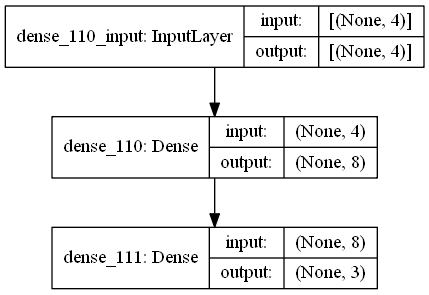

In [131]:
Deep_NN_1 = deepml_model() #Call the model 
Deep_NN_1.summary()#Print the summary 
plot_model(Deep_NN_1, to_file='model_plot.png', show_shapes=True, show_layer_names=True) #Print Schematic Diagram

In [132]:
#Run the model on traning data with input epoch and batch size
h  = Deep_NN_1.fit( Xtrain, Ytrain, epochs=275, batch_size=5)



Epoch 1/275
27/27 [==============================] - 1s 2ms/step - loss: 2.2024 - accuracy: 0.3097
Epoch 2/275
27/27 [==============================] - 0s 2ms/step - loss: 1.9438 - accuracy: 0.3170
Epoch 3/275
27/27 [==============================] - 0s 2ms/step - loss: 1.4953 - accuracy: 0.3019
Epoch 4/275
27/27 [==============================] - 0s 2ms/step - loss: 1.3166 - accuracy: 0.2767
Epoch 5/275
27/27 [==============================] - 0s 2ms/step - loss: 1.2344 - accuracy: 0.2792
Epoch 6/275
27/27 [==============================] - 0s 2ms/step - loss: 0.9862 - accuracy: 0.3111
Epoch 7/275
27/27 [==============================] - 0s 2ms/step - loss: 0.8192 - accuracy: 0.4405
Epoch 8/275
27/27 [==============================] - 0s 2ms/step - loss: 0.7307 - accuracy: 0.6145
Epoch 9/275
27/27 [==============================] - 0s 2ms/step - loss: 0.6061 - accuracy: 0.7063
Epoch 10/275
27/27 [==============================] - 0s 2ms/step - loss: 0.6031 - accuracy: 0.6492
Epoch 11/

27/27 [==============================] - 0s 4ms/step - loss: 0.1641 - accuracy: 0.9588
Epoch 162/275
27/27 [==============================] - 0s 4ms/step - loss: 0.1810 - accuracy: 0.9677
Epoch 163/275
27/27 [==============================] - 0s 3ms/step - loss: 0.1759 - accuracy: 0.9556
Epoch 164/275
27/27 [==============================] - 0s 5ms/step - loss: 0.1600 - accuracy: 0.9865
Epoch 165/275
27/27 [==============================] - 0s 4ms/step - loss: 0.2103 - accuracy: 0.9479
Epoch 166/275
27/27 [==============================] - 0s 4ms/step - loss: 0.1846 - accuracy: 0.9747
Epoch 167/275
27/27 [==============================] - 0s 7ms/step - loss: 0.1736 - accuracy: 0.9569
Epoch 168/275
27/27 [==============================] - 0s 6ms/step - loss: 0.1684 - accuracy: 0.9705: 0s - loss: 0.1684 - accuracy: 0.97
Epoch 169/275
27/27 [==============================] - 0s 4ms/step - loss: 0.1531 - accuracy: 0.9840
Epoch 170/275
27/27 [==============================] - 0s 3ms/step - 

27/27 [==============================] - 0s 3ms/step - loss: 0.1307 - accuracy: 0.9690
Epoch 241/275
27/27 [==============================] - 0s 2ms/step - loss: 0.1040 - accuracy: 0.9889
Epoch 242/275
27/27 [==============================] - ETA: 0s - loss: 0.1548 - accuracy: 0.94 - 0s 3ms/step - loss: 0.1433 - accuracy: 0.9516
Epoch 243/275
27/27 [==============================] - 0s 5ms/step - loss: 0.1190 - accuracy: 0.9769
Epoch 244/275
27/27 [==============================] - 0s 5ms/step - loss: 0.1100 - accuracy: 0.9723
Epoch 245/275
27/27 [==============================] - 0s 10ms/step - loss: 0.1122 - accuracy: 0.9649
Epoch 246/275
27/27 [==============================] - 0s 4ms/step - loss: 0.1217 - accuracy: 0.9623
Epoch 247/275
27/27 [==============================] - 0s 3ms/step - loss: 0.1181 - accuracy: 0.9756
Epoch 248/275
27/27 [==============================] - 0s 3ms/step - loss: 0.1267 - accuracy: 0.9669
Epoch 249/275
27/27 [==============================] - 0s 3ms/

In [133]:
#Get the loss and accuracy 
print('Final training loss \t', h.history['loss'][-1])
print('Final training accuracy ', h.history['accuracy'][-1])

Final training loss 	 0.09684883058071136
Final training accuracy  0.9777777791023254


dict_keys(['loss', 'accuracy'])


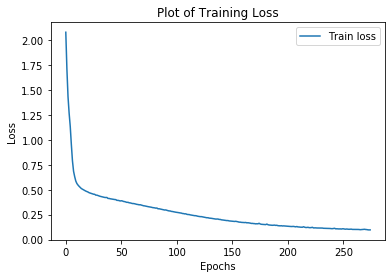

In [134]:
# plot the training loss
history_dict = h.history
print(history_dict.keys()) #Print the available keys 

#Get the plot for training loss & Epochs
plt.plot(h.history['loss'], label='Train loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Plot of Training Loss')
plt.legend()
plt.show()

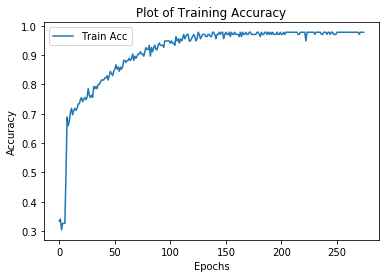

In [135]:
#Get the plot for training accuracy & Epochs
plt.plot(h.history['accuracy'], label='Train Acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Plot of Training Accuracy')
plt.legend()
plt.show()

In [136]:
#Get the test accuracy and loss using test data 
testLoss, testAccuracy = Deep_NN_1.evaluate( Xtest, Ytest)

1/1 [==============================] - 0s 273ms/step - loss: 0.0482 - accuracy: 1.0000


In [137]:
#Print the loss & accuracy data
print('Testing loss \t', testLoss)
print('Testing accuracy ', testAccuracy)

Testing loss 	 0.04815300926566124
Testing accuracy  1.0


# Another way to use KerasClassifier to call Deep ML Model

In [138]:
#Another way to use model with KerasClassifier 
estimate = KerasClassifier(build_fn=deepml_model, epochs=200, batch_size=5, verbose=0)

In [139]:
#Using k fold and splits for cross validation
k_fold = KFold(n_splits=10, shuffle=True, random_state=seed)

In [140]:
#Use cross validation score on giving complete data
results = cross_val_score(estimate, X, y_dummy, cv=k_fold)
print("Model: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Layer 1 Weights := [[-0.39766157  0.04863292 -0.42257172 -0.3937013  -0.53720224 -0.69067824
   0.14513433 -0.3373009 ]
 [ 0.27207375 -0.42022938  0.30512077  0.52976054 -0.36232853  0.35379702
  -0.06444943  0.6848704 ]
 [ 0.38950497  0.43214375  0.31499845 -0.2493045   0.16735011  0.4526828
   0.004053    0.30668563]
 [ 0.34362727 -0.10063893  0.10778296 -0.5535852  -0.6979968   0.60425514
  -0.15455753  0.51258594]]
Layer 1 Bias    := [0. 0. 0. 0. 0. 0. 0. 0.]
Layer 2 Weights := [[-0.28882354 -0.20731527 -0.02490091]
 [ 0.42268544 -0.3349413   0.5419069 ]
 [ 0.25726527 -0.04293293  0.14889419]
 [ 0.00884557  0.36105806  0.15002215]
 [-0.28599933 -0.21802908 -0.48320544]
 [ 0.33199757  0.547085    0.13644189]
 [ 0.17665976  0.5360946   0.19977605]
 [-0.5416714  -0.26908967 -0.0830906 ]]
Layer 2 Bias    := [0. 0. 0.]
Layer 1 Weights := [[-0.48094255 -0.49855036  0.2869342  -0.3147009  -0.42252216  0.35795587
   0.5897595   0.41459233]
 [ 0.4640469  -0.04641277  0.6645234   0.3988554  

Model: 96.00% (5.33%)


# NN with two hidden layers

Now use an NN with two hidden layers. The first hidden layer has 9 neurons.
The second hidden layer has 3 neurons. Arch: [Input,hidden1,hidden2,output]
(i) Use keras to design the NN model and train on the iris data.
(ii) Draw the schematic diagram of the NN 2 along with all the weights and
specify suitable activation function. How many trainable parameters are there?

In [141]:
#Define 2 hidden layer model 
def deepml_2_Hidden_model():
    # Model Creation
    deepml_2H = Sequential()
    
    #Adding hidden layer with 9 neurons with Relu as activation layer
    deepml_2H.add(Dense(9,input_shape=(4,), activation='relu',use_bias=True,bias_initializer='zeros',kernel_initializer='random_normal'))
    #deepml_2H.add(layers.Dropout(0.5))  # Add dropout of 50% to layer : Not helping here
    
    #Adding hidden layer with 3 neurons with Relu as activation function
    deepml_2H.add(Dense(3,input_shape=(4,),activation='relu',use_bias=True,bias_initializer='zeros',kernel_initializer='random_normal'))
    #deepml_2H.add(layers.Dropout(0.5))  # Add dropout of 50% to layer : Not helping here
    
    #Adding output layer with softmax as activation layer
    deepml_2H.add(Dense(3, activation='softmax'))
    
    # Model Compilation
    #Loss as 'categorical_crossentropy' for multiclass output and optimizer as 'adam'
    deepml_2H.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    #Print the Weights & Bias
    print('Layer 1 Weights :=', deepml_2H.layers[0].get_weights()[0])
    print('Layer 1 Bias    :=', deepml_2H.layers[0].get_weights()[1])
    print('Layer 2 Weights :=', deepml_2H.layers[1].get_weights()[0])
    print('Layer 2 Bias    :=', deepml_2H.layers[1].get_weights()[1])
    print('Layer 3 Weights :=', deepml_2H.layers[2].get_weights()[0])
    print('Layer 3 Bias    :=', deepml_2H.layers[2].get_weights()[1])
    return deepml_2H #Return the model with 2 hidden layers

Layer 1 Weights := [[-0.08463785 -0.00555847  0.00568314  0.052109    0.04690908 -0.08265878
   0.05262657 -0.04015196 -0.03428629]
 [-0.05062899 -0.01917813 -0.05740244  0.04420437  0.02355944  0.11967452
  -0.06163789  0.03291995 -0.04766413]
 [-0.05636942 -0.05789015  0.05489867 -0.01452888  0.0809181  -0.03712718
   0.07472464 -0.02705466 -0.00673191]
 [ 0.06803255  0.04601607  0.05245706  0.06308156 -0.03850106  0.00391603
  -0.0595681  -0.04722881 -0.03448876]]
Layer 1 Bias    := [0. 0. 0. 0. 0. 0. 0. 0. 0.]
Layer 2 Weights := [[ 0.00205454 -0.04305154  0.01086676]
 [-0.02928066  0.01972516  0.03134397]
 [-0.03689307  0.05195915  0.08302826]
 [-0.02944665  0.03014601  0.03870834]
 [-0.00630595 -0.05451304 -0.02807569]
 [-0.02138366  0.06466339  0.01349069]
 [-0.02271759  0.04618598  0.02704768]
 [ 0.00969084 -0.01103245  0.08495869]
 [ 0.01062613  0.04645956 -0.03257294]]
Layer 2 Bias    := [0. 0. 0.]
Layer 3 Weights := [[-0.08996892  0.42295885 -0.19994378]
 [ 0.2522397   0.0684

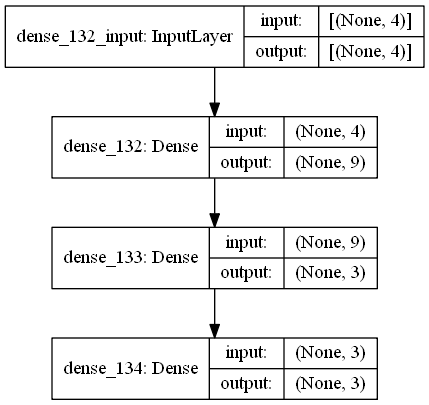

In [142]:
Deep_NN_2 = deepml_2_Hidden_model() #Calling Deep learning model with 2 hidden layers
Deep_NN_2.summary() #Print the summary and parameters
plot_model(Deep_NN_2, to_file='model_plot.png', show_shapes=True, show_layer_names=True) #Print the schematic diagram 

Trainable Parameters: Total params: 87 
        Trainable params: 87 
        Non-trainable params: 0

In [143]:
#Call Deep learning model with training data and input epochs and batch size
h_NN2  = Deep_NN_2.fit( Xtrain, Ytrain, epochs=200, batch_size=5)

Epoch 1/200
27/27 [==============================] - 1s 2ms/step - loss: 1.0924 - accuracy: 0.2985
Epoch 2/200
27/27 [==============================] - 0s 3ms/step - loss: 1.0817 - accuracy: 0.3045
Epoch 3/200
27/27 [==============================] - 0s 3ms/step - loss: 1.0685 - accuracy: 0.3289
Epoch 4/200
27/27 [==============================] - 0s 3ms/step - loss: 1.0492 - accuracy: 0.2884
Epoch 5/200
27/27 [==============================] - 0s 3ms/step - loss: 1.0263 - accuracy: 0.3121
Epoch 6/200
27/27 [==============================] - 0s 3ms/step - loss: 1.0057 - accuracy: 0.3808
Epoch 7/200
27/27 [==============================] - 0s 3ms/step - loss: 0.9550 - accuracy: 0.5685
Epoch 8/200
27/27 [==============================] - 0s 4ms/step - loss: 0.9423 - accuracy: 0.6623
Epoch 9/200
27/27 [==============================] - 0s 3ms/step - loss: 0.9193 - accuracy: 0.6204
Epoch 10/200
27/27 [==============================] - 0s 3ms/step - loss: 0.8893 - accuracy: 0.6106
Epoch 11/

27/27 [==============================] - 0s 3ms/step - loss: 0.0915 - accuracy: 0.9606
Epoch 164/200
27/27 [==============================] - 0s 2ms/step - loss: 0.1027 - accuracy: 0.9679
Epoch 165/200
27/27 [==============================] - 0s 3ms/step - loss: 0.1160 - accuracy: 0.9706
Epoch 166/200
27/27 [==============================] - 0s 3ms/step - loss: 0.0852 - accuracy: 0.9748
Epoch 167/200
27/27 [==============================] - 0s 3ms/step - loss: 0.1320 - accuracy: 0.9272
Epoch 168/200
27/27 [==============================] - 0s 3ms/step - loss: 0.0863 - accuracy: 0.9636
Epoch 169/200
27/27 [==============================] - 0s 3ms/step - loss: 0.0818 - accuracy: 0.9839
Epoch 170/200
27/27 [==============================] - 0s 3ms/step - loss: 0.0674 - accuracy: 0.9917
Epoch 171/200
27/27 [==============================] - 0s 3ms/step - loss: 0.0768 - accuracy: 0.9968
Epoch 172/200
27/27 [==============================] - 0s 3ms/step - loss: 0.1140 - accuracy: 0.9706
Epoc

In [144]:
#Print the accuracy & loss from 2 hidden layer model 
print('Final training loss \t', h_NN2.history['loss'][-1])
print('Final training accuracy ', h_NN2.history['accuracy'][-1])

Final training loss 	 0.07172280550003052
Final training accuracy  0.9851852059364319


dict_keys(['loss', 'accuracy'])


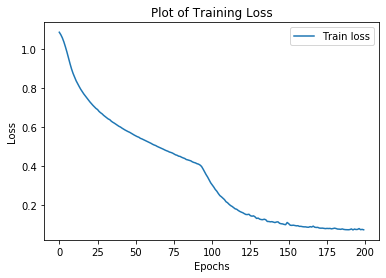

In [145]:
# plot the training loss
history_dict = h_NN2.history
print(history_dict.keys()) #Print the available keys to et outputs

#Plot the visualization with loss & Epochs
plt.plot(h_NN2.history['loss'], label='Train loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Plot of Training Loss')
plt.legend()
plt.show()

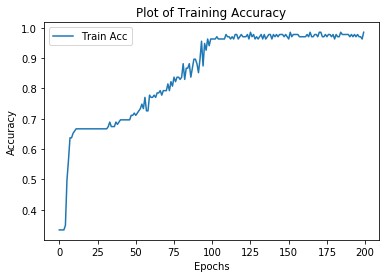

In [146]:
# plot the training accuracy & Epochs
plt.plot(h_NN2.history['accuracy'], label='Train Acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Plot of Training Accuracy')
plt.legend()
plt.show()

In [147]:
#Test the built model with testing data
testLoss, testAccuracy = Deep_NN_2.evaluate( Xtest, Ytest)

1/1 [==============================] - 0s 373ms/step - loss: 0.0212 - accuracy: 1.0000


In [148]:
#Get the loss & Accuracy from testing data
print('Testing loss \t', testLoss)
print('Testing accuracy ', testAccuracy)

Testing loss 	 0.02116204984486103
Testing accuracy  1.0


# Another way to use KerasClassifier to call Deep ML Model

In [164]:
#Another way to use model with KerasClassifier 
estimate_2H = KerasClassifier(build_fn=deepml_2_Hidden_model, epochs=200, batch_size=5, verbose=0)


In [165]:
#Using k fold and splits for cross validation
k_fold = KFold(n_splits=10, shuffle=True, random_state=seed)

In [166]:
#Use cross validation score on giving complete data
results = cross_val_score(estimate_2H, X, y_dummy, cv=k_fold)
print("Model: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Layer 1 Weights := [[ 0.01538417 -0.05826864 -0.01077686 -0.00701575 -0.00416314 -0.06252923
  -0.06404853  0.0065323  -0.06956482]
 [-0.00204838  0.09521829 -0.02303716 -0.00350679 -0.0234755   0.02069957
   0.01208144  0.01332334 -0.02404716]
 [ 0.01025756 -0.0213363   0.01893982 -0.02383482  0.00990696  0.14807029
   0.03648667  0.02664511  0.06804319]
 [-0.08423756  0.01823137  0.06119576  0.04280449  0.03347584  0.03942932
  -0.03944486  0.01581869  0.05137316]]
Layer 1 Bias    := [0. 0. 0. 0. 0. 0. 0. 0. 0.]
Layer 2 Weights := [[-0.02850771  0.0595802   0.03347887]
 [ 0.02223371 -0.00602235  0.02281381]
 [ 0.00392401 -0.03685563  0.06280737]
 [-0.03095239  0.07811926 -0.00938326]
 [-0.00291241 -0.04015392 -0.01590124]
 [-0.07343369  0.06814843 -0.06144482]
 [-0.00937001  0.05620275 -0.08715477]
 [-0.00459473  0.06219874  0.00756844]
 [-0.08143636 -0.04873955  0.07406735]]
Layer 2 Bias    := [0. 0. 0.]
Layer 3 Weights := [[-0.29331398  0.12715793 -0.52251816]
 [-0.71551013 -0.8835

Layer 1 Weights := [[ 0.04075621  0.00143921 -0.0259835  -0.02084062 -0.03538654  0.00317549
   0.01228395 -0.01625241 -0.02269983]
 [ 0.10912538  0.00517896  0.0101717   0.00745025 -0.10772462 -0.0004002
   0.02985589  0.02619768  0.00851897]
 [-0.05943997 -0.037473    0.03392536  0.02440351  0.03388768  0.02643187
  -0.0822298  -0.04215713  0.03407044]
 [-0.04210295 -0.02055922 -0.07359532  0.04695588  0.06649856 -0.02375504
   0.02890694 -0.0223511  -0.07224827]]
Layer 1 Bias    := [0. 0. 0. 0. 0. 0. 0. 0. 0.]
Layer 2 Weights := [[ 0.03516432 -0.05565753  0.02473317]
 [-0.03143187  0.0196546   0.03297562]
 [ 0.09461208 -0.08472851 -0.02993353]
 [ 0.01582735  0.07903969 -0.01681839]
 [ 0.08851403 -0.03482408  0.01789079]
 [ 0.06548651 -0.00296199  0.02238561]
 [ 0.06087774 -0.00671822  0.03735797]
 [-0.00918886  0.02490674 -0.01943348]
 [ 0.006006    0.09704827 -0.03464934]]
Layer 2 Bias    := [0. 0. 0.]
Layer 3 Weights := [[ 0.75338936  0.05237794  0.9930823 ]
 [ 0.33970237 -0.45745

# ANN Visualization 

In [170]:
#Import ann visualizer library 
from ann_visualizer.visualize import ann_viz; 

In [171]:
#Plot ANN for Model1 having one hidden layer with 8 neurons.
ann_viz(Deep_NN_1,filename="Deep_NN_1",title="Deep Neural Network with 1 Hidden layers") 

In [172]:
#Plot ANN for Model1 having two hidden layers with 9 & 3 neurons respectively. 
ann_viz(Deep_NN_2,filename="Deep_NN_2",title="Deep Neural Network with 2 Hidden layers")

Note: Below images are extracted into PNG format to display at below cells. Above 2 cmds would create filename.pdf at local directory.

![](Deep_NN_1.png)

![](Deep_NN_2.png)

# Activation function & trainable parameters 